In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
DATA_FOLDER_PATH = os.getcwd() + '/../data/KS VERI/CHILLER/'

In [3]:
FILE_NAMES = ['CHILLER 1 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx',
              'CHILLER 1 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx',
              'CHILLER 2 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx',
              'CHILLER 2 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx',
              'CHILLER 3 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx',
              'CHILLER 3 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx']

In [4]:
PATHS = [DATA_FOLDER_PATH + file_name for file_name in FILE_NAMES]

In [5]:
ALL_DF = []
for i in range(len(PATHS)):
    print(PATHS[i])
    DF = pd.read_excel(PATHS[i], sheet_name='Sheet2', skiprows=7, usecols='A:C')
    DF = DF[:-1]

    # change timestamp data to datetime format
    TIMESTAMPS = DF['Timestamp'].tolist()

    # the format of the timestamp is '3/1/2022 9:45 PM', we need to convert it to datetime format to be able to use it
    NEW_TIMESTAMPS = []
    DROP_INDEXES = []
    for j in range(len(TIMESTAMPS)):
        timestamp = TIMESTAMPS[j]
        if isinstance(timestamp, float):
            DROP_INDEXES.append(j)
            continue
        
        NEW_TIMESTAMPS.append(pd.to_datetime(timestamp))
        
    DF = DF.drop(DROP_INDEXES)
        
    DF['Timestamp'] = NEW_TIMESTAMPS
    
    ALL_DF.append(DF)

/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 1 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 1 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 2 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 2 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 3 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 3 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx


In [6]:
# merge 0-1, 2-3, 4-5
MERGED_DF = []
for i in range(0, len(ALL_DF), 2):
    MERGED_DF.append(pd.concat([ALL_DF[i], ALL_DF[i+1]]).sort_values(by=['Timestamp']).reset_index(drop=True))

NEW_MERGED_DF = MERGED_DF.copy()

# check if all dataframes have the same length and same timestamps
ALL_TIMESTAMPS = []
for i in range(len(NEW_MERGED_DF)):
    ALL_TIMESTAMPS += NEW_MERGED_DF[i]['Timestamp'].tolist()
    
ALL_TIMESTAMPS = list(set(ALL_TIMESTAMPS))
ALL_TIMESTAMPS.sort()

# check if all timestamps are the same with the same order in all dataframes
len_list = [len(df) for df in NEW_MERGED_DF]
for i in range(len(ALL_TIMESTAMPS)):
    timestamp = ALL_TIMESTAMPS[i]
    #print('Timestamp:', timestamp)
    
    for t in range(len(NEW_MERGED_DF)):
        if len_list[t] <= i:
            NEW_MERGED_DF[t].loc[len_list[t]] = [timestamp, float('nan'), float('nan')]
            len_list[t] += 1
            NEW_MERGED_DF[t] = NEW_MERGED_DF[t].sort_values(by=['Timestamp']).reset_index(drop=True)
    
    # check if all dataframes have the same timestamp
    timestamps = []
    for j in range(len(NEW_MERGED_DF)):
        timestamps.append(NEW_MERGED_DF[j]['Timestamp'][i])
    
    organized = [False for i in range(len(NEW_MERGED_DF))]
    if len(set(timestamps)) != 1:
        print('ERROR: Timestamps are not the same!')
        print('current timestamp:', timestamp)
        print('timestamps:', timestamps)
        for k in range(len(NEW_MERGED_DF)):
            if timestamps[k] != timestamp:
                print('DF', k, 'timestamp:', timestamps[k])
                # add timestamp to the dataframe with nan values for the other columns to last row
                # and then sort the dataframe by timestamp
                NEW_MERGED_DF[k].loc[len_list[k]] = [timestamp, float('nan'), float('nan')]
                len_list[k] += 1
                organized[k] = True
                print('DF', k, 'new timestamp:', NEW_MERGED_DF[k]['Timestamp'][len_list[k]-1])
    
    for j in range(len(NEW_MERGED_DF)):
        if organized[j]:
            # sort the dataframe by timestamp
            NEW_MERGED_DF[j] = NEW_MERGED_DF[j].sort_values(by=['Timestamp']).reset_index(drop=True)
            print('DF', j, 'new length:', len(NEW_MERGED_DF[j]))
            print('DF', j, 'new timestamp:', NEW_MERGED_DF[j]['Timestamp'][i-1:i+2].tolist())
            print('DF', j, 'new values:', NEW_MERGED_DF[j]['Timestamp'][len_list[j]-1])
            
print('\nLength of all dataframes:')
for i in range(len(NEW_MERGED_DF)):
    if i != 0:
        NEW_MERGED_DF[i] = NEW_MERGED_DF[i].drop(columns=['Timestamp'])
    print(len(NEW_MERGED_DF[i]))

# concat all dataframes side by side to create a single dataframe with all data according to timestamps
FINAL_DF = pd.concat(NEW_MERGED_DF, axis=1)

ERROR: Timestamps are not the same!
current timestamp: 2022-03-28 18:50:00
timestamps: [Timestamp('2022-03-28 18:55:00'), Timestamp('2022-03-28 18:50:00'), Timestamp('2022-03-28 18:50:00')]
DF 0 timestamp: 2022-03-28 18:55:00
DF 0 new timestamp: 2022-03-28 18:50:00
DF 0 new length: 173724
DF 0 new timestamp: [Timestamp('2022-03-28 00:10:00'), Timestamp('2022-03-28 18:50:00'), Timestamp('2022-03-28 18:55:00')]
DF 0 new values: 2023-11-01 22:10:00
ERROR: Timestamps are not the same!
current timestamp: 2023-09-06 10:55:00
timestamps: [Timestamp('2023-09-06 11:00:00'), Timestamp('2023-09-06 10:55:00'), Timestamp('2023-09-06 10:55:00')]
DF 0 timestamp: 2023-09-06 11:00:00
DF 0 new timestamp: 2023-09-06 10:55:00
DF 0 new length: 173725
DF 0 new timestamp: [Timestamp('2023-09-06 10:45:00'), Timestamp('2023-09-06 10:55:00'), Timestamp('2023-09-06 11:00:00')]
DF 0 new values: 2023-11-01 22:10:00

Length of all dataframes:
173730
173730
173730


In [7]:
FINAL_DF

,Timestamp,KS.KS_PLC\nCH1_CIKIS_SIC,KS.KS_PLC\nCH1_GIRIS_SIC,KS.KS_PLC\nCH2_CIKIS_SIC,KS.KS_PLC\nCH2_GIRIS_SIC,KS.KS_PLC\nCH3_CIKIS_SIC,KS.KS_PLC\nCH3_GIRIS_SIC
0,2022-03-01 21:45:00,14.4,15.0,14.3,14.8,15.400000,15.9
1,2022-03-01 21:50:00,14.4,15.0,14.3,14.5,15.400000,15.9
2,2022-03-01 21:55:00,14.4,15.0,14.3,14.5,15.400000,15.9
3,2022-03-01 22:00:00,14.4,15.0,14.3,14.5,15.400000,15.9
4,2022-03-01 22:05:00,14.4,15.0,14.3,14.5,15.400000,15.9
...,...,...,...,...,...,...,...
173725,2023-11-01 22:15:00,NaN,NaN,94.800003,96.900002,18.200001,18.5
173726,2023-11-01 22:20:00,NaN,NaN,94.800003,96.900002,18.200001,18.5
173727,2023-11-01 22:25:00,NaN,NaN,NaT,NaT,NaN,NaN
173728,2023-11-01 22:30:00,NaN,NaN,NaN,NaN,17.299999,17.9


In [8]:
print('Length of the dataframe before dropping nan values:', len(FINAL_DF))

# count nan values in each column, but if there are in the same row, it counts as 1
# so we need to count the number of rows that contains at least 1 nan value
nan_rows = []
for i in range(len(FINAL_DF)):
    if FINAL_DF.iloc[i].isnull().values.any():
        nan_rows.append(i)

print('Number of rows that contains at least 1 nan value:', len(nan_rows))

# drop nan values
FINAL_DF_NONAN = FINAL_DF.copy()
FINAL_DF_NONAN = FINAL_DF_NONAN.dropna()
FINAL_DF_NONAN = FINAL_DF_NONAN.reset_index(drop=True)

print('Length of the dataframe after dropping nan values:', len(FINAL_DF_NONAN))

Length of the dataframe before dropping nan values: 173730
Number of rows that contains at least 1 nan value: 1018
Length of the dataframe after dropping nan values: 172712


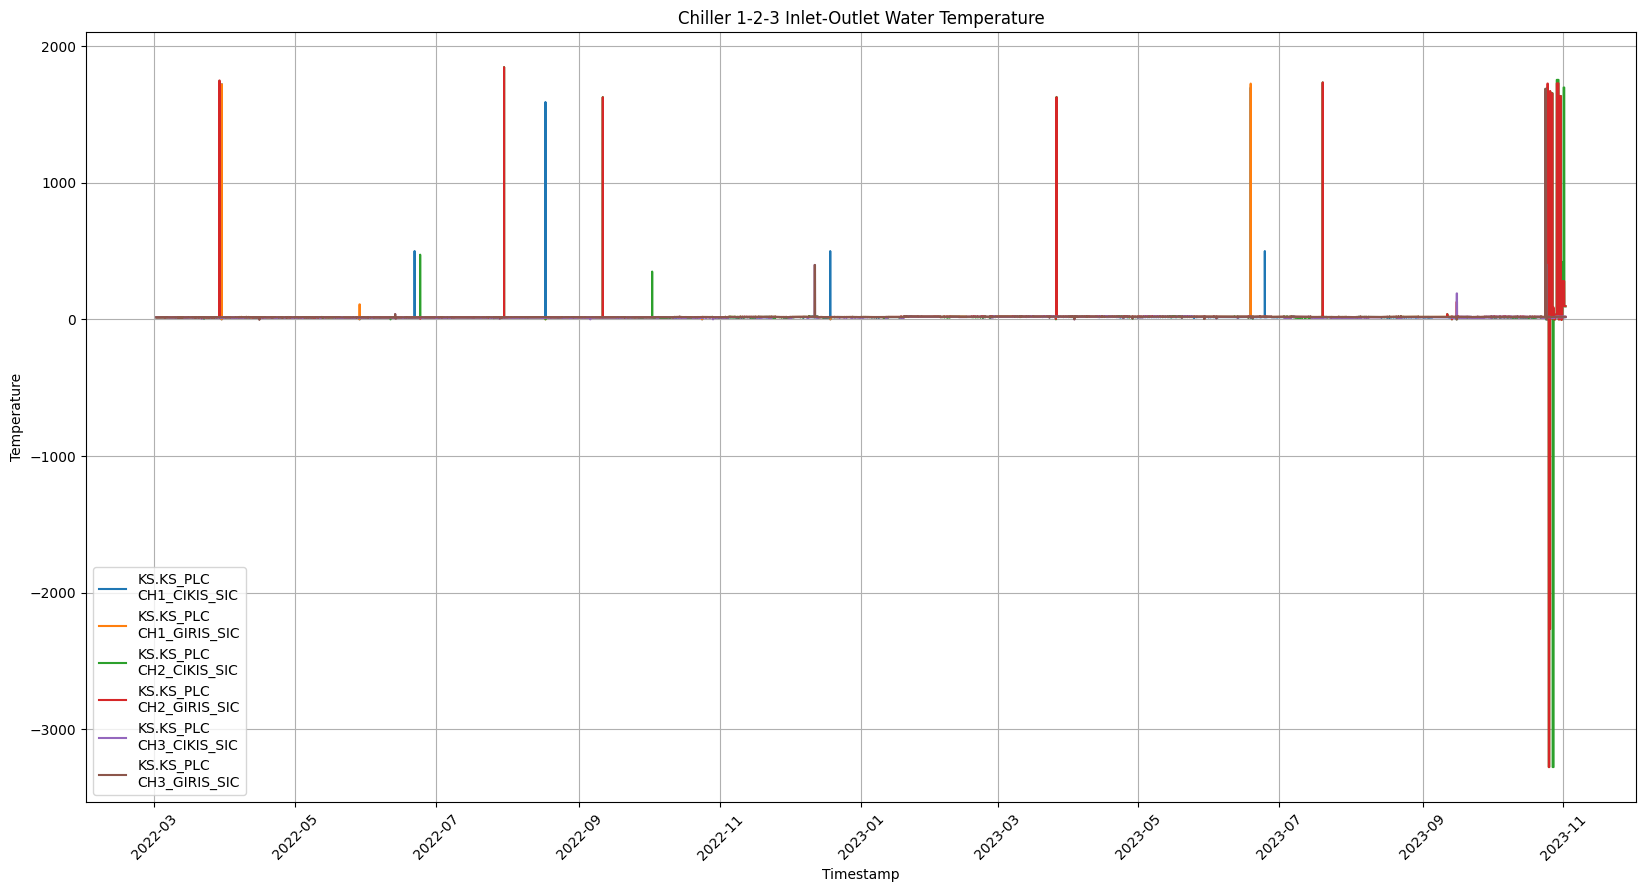

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(FINAL_DF_NONAN['Timestamp'], FINAL_DF_NONAN[FINAL_DF_NONAN.columns[1:]], label=FINAL_DF_NONAN.columns[1:])

plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Chiller 1-2-3 Inlet-Outlet Water Temperature')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [10]:
for i in range(len(FINAL_DF_NONAN.columns[1:])):
    # find extreme values
    max_value = FINAL_DF_NONAN[FINAL_DF_NONAN.columns[i+1]].max()
    min_value = FINAL_DF_NONAN[FINAL_DF_NONAN.columns[i+1]].min()
    max_index = FINAL_DF_NONAN[FINAL_DF_NONAN.columns[i+1]].idxmax()
    min_index = FINAL_DF_NONAN[FINAL_DF_NONAN.columns[i+1]].idxmin()
    print('Column:', FINAL_DF_NONAN.columns[i+1])
    print('Max value:', max_value, 'on date:', FINAL_DF_NONAN['Timestamp'][max_index])
    print('Min value:', min_value, 'on date:', FINAL_DF_NONAN['Timestamp'][min_index])
    print('')

Column: KS.KS_PLC
CH1_CIKIS_SIC
Max value: 1720.5 on date: 2022-03-30 04:15:00
Min value: -0.100000001490116 on date: 2023-10-24 11:40:00

Column: KS.KS_PLC
CH1_GIRIS_SIC
Max value: 1725.40002441406 on date: 2023-06-18 13:10:00
Min value: 0.0 on date: 2022-03-30 01:20:00

Column: KS.KS_PLC
CH2_CIKIS_SIC
Max value: 1846.40002441406 on date: 2022-07-30 09:10:00
Min value: -3276.80004882813 on date: 2023-10-25 14:40:00

Column: KS.KS_PLC
CH2_GIRIS_SIC
Max value: 1845.90002441406 on date: 2022-07-30 09:10:00
Min value: -3276.80004882813 on date: 2023-10-25 14:40:00

Column: KS.KS_PLC
CH3_CIKIS_SIC
Max value: 1664.19995117188 on date: 2023-10-24 01:15:00
Min value: -0.200000002980232 on date: 2023-04-03 06:50:00

Column: KS.KS_PLC
CH3_GIRIS_SIC
Max value: 1687.5 on date: 2023-10-24 01:15:00
Min value: -0.100000001490116 on date: 2023-04-03 06:50:00



In [11]:
# find all values that are greater than 100 and less than 0
indexes = []
for col in FINAL_DF_NONAN.columns[1:]:
    print('Column:', col)
    for j in range(len(FINAL_DF_NONAN)):
        value = FINAL_DF_NONAN[col][j]
        if value > 35 or value < 10:
            print('Value:', value, 'on date:', FINAL_DF_NONAN['Timestamp'][j])
            indexes.append(j)

Column: KS.KS_PLC
CH1_CIKIS_SIC
Value: 8.80000019073486 on date: 2022-03-22 11:25:00
Value: 8.80000019073486 on date: 2022-03-22 11:30:00
Value: 8.19999980926514 on date: 2022-03-22 11:35:00
Value: 7.30000019073486 on date: 2022-03-22 11:40:00
Value: 0.300000011920929 on date: 2022-03-30 01:20:00
Value: 0.300000011920929 on date: 2022-03-30 01:25:00
Value: 0.300000011920929 on date: 2022-03-30 01:30:00
Value: 0.300000011920929 on date: 2022-03-30 01:35:00
Value: 0.300000011920929 on date: 2022-03-30 01:40:00
Value: 0.300000011920929 on date: 2022-03-30 01:45:00
Value: 0.300000011920929 on date: 2022-03-30 01:50:00
Value: 0.300000011920929 on date: 2022-03-30 01:55:00
Value: 0.300000011920929 on date: 2022-03-30 02:00:00
Value: 0.300000011920929 on date: 2022-03-30 02:05:00
Value: 0.300000011920929 on date: 2022-03-30 02:10:00
Value: 0.300000011920929 on date: 2022-03-30 02:15:00
Value: 0.300000011920929 on date: 2022-03-30 02:20:00
Value: 0.300000011920929 on date: 2022-03-30 02:25:00


In [12]:
print('Total number of extreme values:', len(indexes))
print('Total number of values:', len(FINAL_DF_NONAN) * len(FINAL_DF_NONAN.columns[1:]))
print('Percentage of extreme values: %', len(indexes) / (len(FINAL_DF_NONAN) * len(FINAL_DF_NONAN.columns[1:])) * 100)

print('Total number of rows containing extreme values:', len(set(indexes)))
print('Percentage of rows containing extreme values: %', len(set(indexes)) / len(FINAL_DF_NONAN) * 100)

Total number of extreme values: 5469
Total number of values: 1036272
Percentage of extreme values: % 0.5277571911621659
Total number of rows containing extreme values: 2648
Percentage of rows containing extreme values: % 1.5331881976932697


In [13]:
# drop extreme values
FINAL_DF_NONAN_NOEXTREME = FINAL_DF_NONAN.copy()
FINAL_DF_NONAN_NOEXTREME = FINAL_DF_NONAN_NOEXTREME.drop(indexes)
FINAL_DF_NONAN_NOEXTREME = FINAL_DF_NONAN_NOEXTREME.reset_index(drop=True)

print('Length of the dataframe after dropping extreme values:', len(FINAL_DF_NONAN_NOEXTREME))

Length of the dataframe after dropping extreme values: 170064


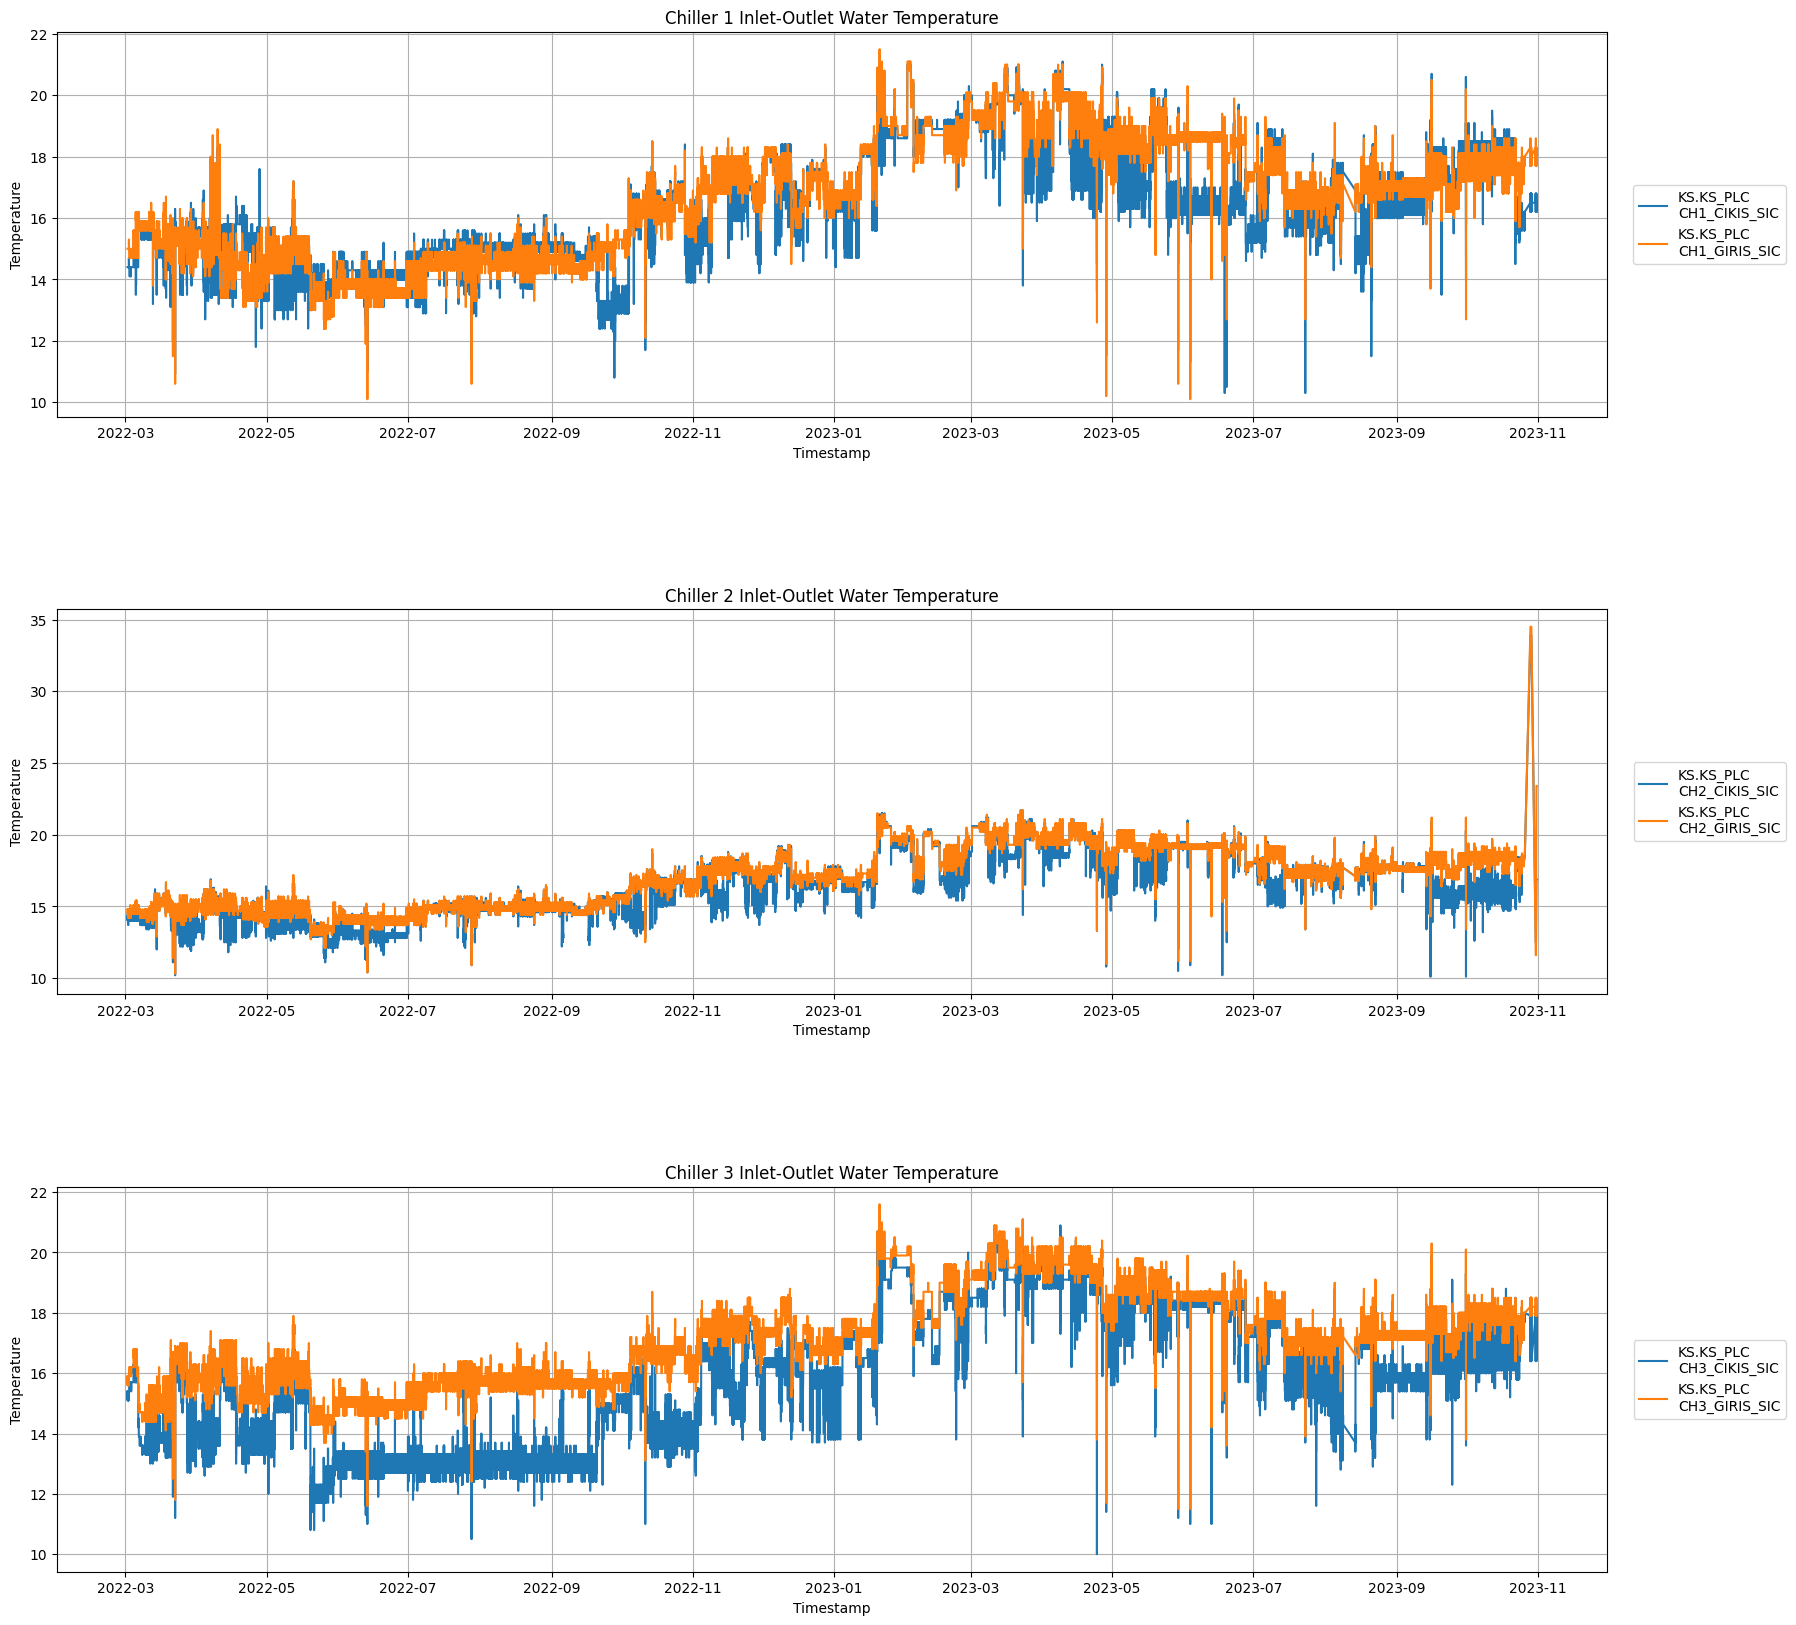

In [14]:
figure, axis = plt.subplots(3, 1, figsize=(20, 20))

# put some space between subplots
figure.subplots_adjust(hspace=0.5)

# put legend outside of the plot area to the right of the plot

axis[0].plot(FINAL_DF_NONAN_NOEXTREME['Timestamp'], 
             FINAL_DF_NONAN_NOEXTREME[FINAL_DF_NONAN_NOEXTREME.columns[1:3]],
             label=FINAL_DF_NONAN_NOEXTREME.columns[1:3])
axis[0].set_xlabel('Timestamp')
axis[0].set_ylabel('Temperature')
axis[0].set_title('Chiller 1 Inlet-Outlet Water Temperature')
axis[0].grid(True)
axis[0].legend(loc='center right',bbox_to_anchor=(1.12, 0.5))

axis[1].plot(FINAL_DF_NONAN_NOEXTREME['Timestamp'],
             FINAL_DF_NONAN_NOEXTREME[FINAL_DF_NONAN_NOEXTREME.columns[3:5]],
             label=FINAL_DF_NONAN_NOEXTREME.columns[3:5])
axis[1].set_xlabel('Timestamp')
axis[1].set_ylabel('Temperature')
axis[1].set_title('Chiller 2 Inlet-Outlet Water Temperature')
axis[1].grid(True)
axis[1].legend(loc='center right',bbox_to_anchor=(1.12, 0.5))

axis[2].plot(FINAL_DF_NONAN_NOEXTREME['Timestamp'],
             FINAL_DF_NONAN_NOEXTREME[FINAL_DF_NONAN_NOEXTREME.columns[5:]],
             label=FINAL_DF_NONAN_NOEXTREME.columns[5:])
axis[2].set_xlabel('Timestamp')
axis[2].set_ylabel('Temperature')
axis[2].set_title('Chiller 3 Inlet-Outlet Water Temperature')
axis[2].grid(True)
axis[2].legend(loc='center right',bbox_to_anchor=(1.12, 0.5))

plt.show()

In [15]:
# save dataframe to csv file
FINAL_DF.to_csv(os.getcwd() + '/../data/KS VERI/CLEAN_DATA/CHILLER.csv', index=False)
FINAL_DF_NONAN.to_csv(os.getcwd() + '/../data/KS VERI/CLEAN_DATA/CHILLER_NONAN.csv', index=False)
FINAL_DF_NONAN_NOEXTREME.to_csv(os.getcwd() + '/../data/KS VERI/CLEAN_DATA/CHILLER_NONAN_NOEXTREME_10_35.csv', index=False)